# Association Rule

## 연관성 규칙에서 사용되는 측도 정의

- 지지도(Support) : 전체 거래 건수 중 항목 X, Y가 동시에 포함된 거래의 건수
- 신뢰도(Confidence) : 항목 X를 포함하는 거래 중 항목 Y가 동시에 포함된 거래의 건수
- 향상도(Lift) : 항목 X가 주어지지 않았을 때 Y의 확률 대비 항목 X가 주어졌을 때 Y의 확률 증가 비율

In [1]:
install.packages("arules")
library(arules)

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpK0Kgbr\downloaded_packages


Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
data(Groceries)

### Data structure 파악

    - i : 개별 아이템의 index number
    - p : 아이템 그룹에서 첫 번째 아이템의 순서 number
    - Dim : 전체 차원
    - labels : item name
    - level2 : 상품 소분류
    - level1 : 상품 대분류

In [3]:
str(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [5]:
table(Groceries@data@i)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 580  924   50  256  254   64   22  422   80  567  516  327   29  814 1032  744 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 220  327   33 1072  305  160 1903  128 2513  545  524  365  275 1372  705  256 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 329  101   13  168  241  241  390  163  110   50   84   90    8   23  473   12 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 279  115    6  246  106   83  624 1809  414  638  875  101  174   68   28  171 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
 106   75  148   64  276  576   36  333   32   15  118   42   51   67   18   79 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
  54   56   16  174    2   23  106   32  176   17   53   89   42  148   84  229 
  96   97   98   99  100  1

In [7]:
table(Groceries@data@Dim)


 169 9835 
   1    1 

In [8]:
head(Groceries@itemInfo)

labels,level2,level1
frankfurter,sausage,meat and sausage
sausage,sausage,meat and sausage
liver loaf,sausage,meat and sausage
ham,sausage,meat and sausage
meat,sausage,meat and sausage
finished products,sausage,meat and sausage


In [9]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

### inspect로 세부 항목 에 대한 정보 추출

In [10]:
inspect(head(Groceries))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


### apriori function 적용

In [14]:
G_arules <- apriori(Groceries, parameter=list(support=0.01, confidence=0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [125 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


-> 125개의 rule이 나왔음을 알 수 있음

In [15]:
summary(G_arules)

set of 125 rules

rule length distribution (lhs + rhs):sizes
 2  3 
69 56 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.448   3.000   3.000 

summary of quality measures:
    support          confidence          lift      
 Min.   :0.01007   Min.   :0.3079   Min.   :1.205  
 1st Qu.:0.01149   1st Qu.:0.3454   1st Qu.:1.608  
 Median :0.01454   Median :0.3978   Median :1.789  
 Mean   :0.01859   Mean   :0.4058   Mean   :1.906  
 3rd Qu.:0.02217   3rd Qu.:0.4496   3rd Qu.:2.155  
 Max.   :0.07483   Max.   :0.5862   Max.   :3.295  

mining info:
      data ntransactions support confidence
 Groceries          9835    0.01        0.3

In [16]:
str(G_arules)

Formal class 'rules' [package "arules"] with 4 slots
  ..@ lhs    :Formal class 'itemMatrix' [package "arules"] with 3 slots
  .. .. ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. .. .. ..@ i       : int [1:181] 37 28 28 3 36 68 20 20 17 17 ...
  .. .. .. .. ..@ p       : int [1:126] 0 1 2 3 4 5 6 7 8 9 ...
  .. .. .. .. ..@ Dim     : int [1:2] 169 125
  .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. ..$ : NULL
  .. .. .. .. ..@ factors : list()
  .. .. ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. .. .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. .. .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. .. .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  .. .. ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables
  ..@ rhs    :Formal class 'itemMatrix' [package "arules"] with 3 slots
  .. .. ..@ data   

In [17]:
inspect(head(G_arules))

    lhs                rhs                support    confidence lift    
[1] {hard cheese}   => {whole milk}       0.01006609 0.4107884  1.607682
[2] {butter milk}   => {other vegetables} 0.01037112 0.3709091  1.916916
[3] {butter milk}   => {whole milk}       0.01159126 0.4145455  1.622385
[4] {ham}           => {whole milk}       0.01148958 0.4414062  1.727509
[5] {sliced cheese} => {whole milk}       0.01077783 0.4398340  1.721356
[6] {oil}           => {whole milk}       0.01128622 0.4021739  1.573968


In [18]:
summary(G_arules@quality$lift)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.205   1.608   1.789   1.906   2.155   3.295 

- ##  Filtering the rules

#### right hand side 가 "yogurt"이고 lift가 2 이상인 subset을 추출 : 9 rules

In [19]:
(G_arules_yogurt <- subset(G_arules, subset = rhs %in% "yogurt" & lift > 2))

set of 9 rules 

In [20]:
inspect(G_arules_yogurt)

    lhs                                      rhs      support    confidence
[1] {berries}                             => {yogurt} 0.01057448 0.3180428 
[2] {cream cheese }                       => {yogurt} 0.01240468 0.3128205 
[3] {curd}                                => {yogurt} 0.01728521 0.3244275 
[4] {whole milk,curd}                     => {yogurt} 0.01006609 0.3852140 
[5] {other vegetables,whipped/sour cream} => {yogurt} 0.01016777 0.3521127 
[6] {whole milk,whipped/sour cream}       => {yogurt} 0.01087951 0.3375394 
[7] {citrus fruit,whole milk}             => {yogurt} 0.01026945 0.3366667 
[8] {tropical fruit,other vegetables}     => {yogurt} 0.01230300 0.3427762 
[9] {tropical fruit,whole milk}           => {yogurt} 0.01514997 0.3581731 
    lift    
[1] 2.279848
[2] 2.242412
[3] 2.325615
[4] 2.761356
[5] 2.524073
[6] 2.419607
[7] 2.413350
[8] 2.457146
[9] 2.567516


In [21]:
inspect(G_arules_yogurt@lhs)

    items                                
[1] {berries}                            
[2] {cream cheese }                      
[3] {curd}                               
[4] {whole milk,curd}                    
[5] {other vegetables,whipped/sour cream}
[6] {whole milk,whipped/sour cream}      
[7] {citrus fruit,whole milk}            
[8] {tropical fruit,other vegetables}    
[9] {tropical fruit,whole milk}          


* ## ArulesViz

    - 125개의 모든 rule에 대해서 일일히 파악하기 어려움
    - ArulesViz를 활용해 시각화

In [22]:
install.packages("arulesViz")


also installing the dependencies 'modeltools', 'mclust', 'flexmix', 'prabclus', 'diptest', 'mvtnorm', 'trimcluster', 'gridExtra', 'bitops', 'fpc', 'viridis', 'gtools', 'gdata', 'caTools', 'lmtest', 'TSP', 'qap', 'gclus', 'dendextend', 'gplots', 'registry', 'irlba', 'crosstalk', 'scatterplot3d', 'vcd', 'seriation', 'igraph', 'DT', 'plotly'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked


Warning message:
"unable to move temporary installation 'C:\Users\student\Anaconda3\Lib\R\library\file58c693c2938\mclust' to 'C:\Users\student\Anaconda3\Lib\R\library\mclust'"

package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'trimcluster' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'dendextend' successfully un

Loading required package: grid


ERROR: Error: package or namespace load failed for 'arulesViz' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'mclust'


In [26]:
library(mclust)

Package 'mclust' version 5.3
Type 'citation("mclust")' for citing this R package in publications.


In [27]:
library(arulesViz)

In [28]:
G_arulesViz<-apriori(Groceries, parameter=list(support=0.005, confidence=0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [482 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [29]:
G_arulesViz
inspect(head(G_arulesViz,by="confidence"))

set of 482 rules 

    lhs                     rhs              support confidence     lift
[1] {tropical fruit,                                                    
     root vegetables,                                                   
     yogurt}             => {whole milk} 0.005693950  0.7000000 2.739554
[2] {pip fruit,                                                         
     root vegetables,                                                   
     other vegetables}   => {whole milk} 0.005490595  0.6750000 2.641713
[3] {butter,                                                            
     whipped/sour cream} => {whole milk} 0.006710727  0.6600000 2.583008
[4] {pip fruit,                                                         
     whipped/sour cream} => {whole milk} 0.005998983  0.6483516 2.537421
[5] {butter,                                                            
     yogurt}             => {whole milk} 0.009354347  0.6388889 2.500387
[6] {root vegetables,                              

* support 와 confidence 를 기준으로 plotting

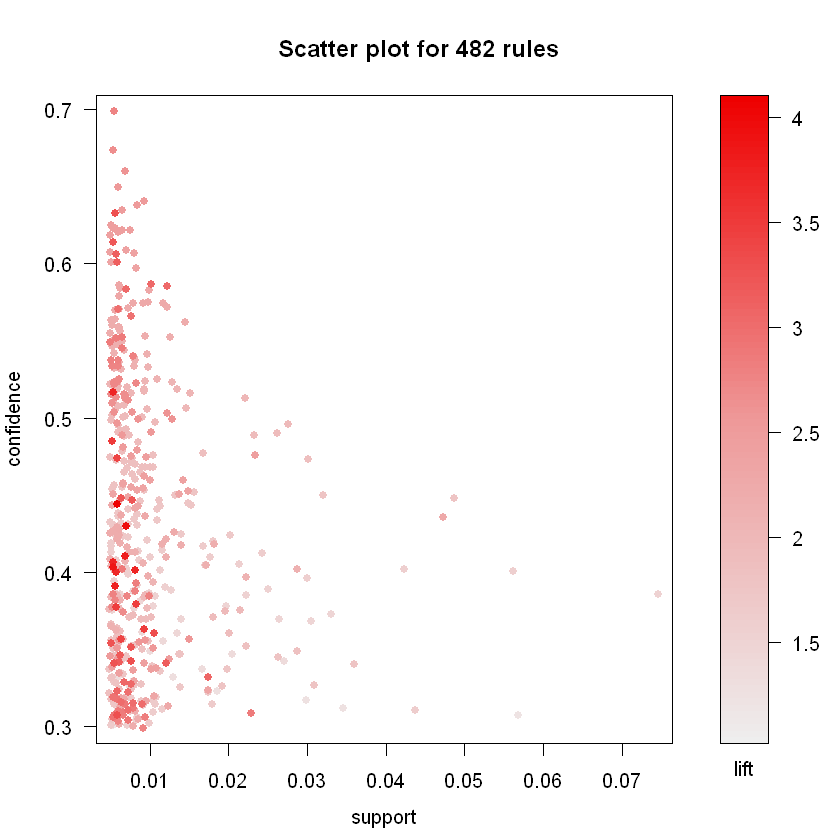

In [30]:
plot(G_arulesViz)

* #### interactive = TRUE 를 이용하면 inspect, filter, zoom in/out 으로 쉽게 특정 조건에 해당하는 데이터를 파악할 수 있다.

Interactive mode.
Select a region with two clicks!


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


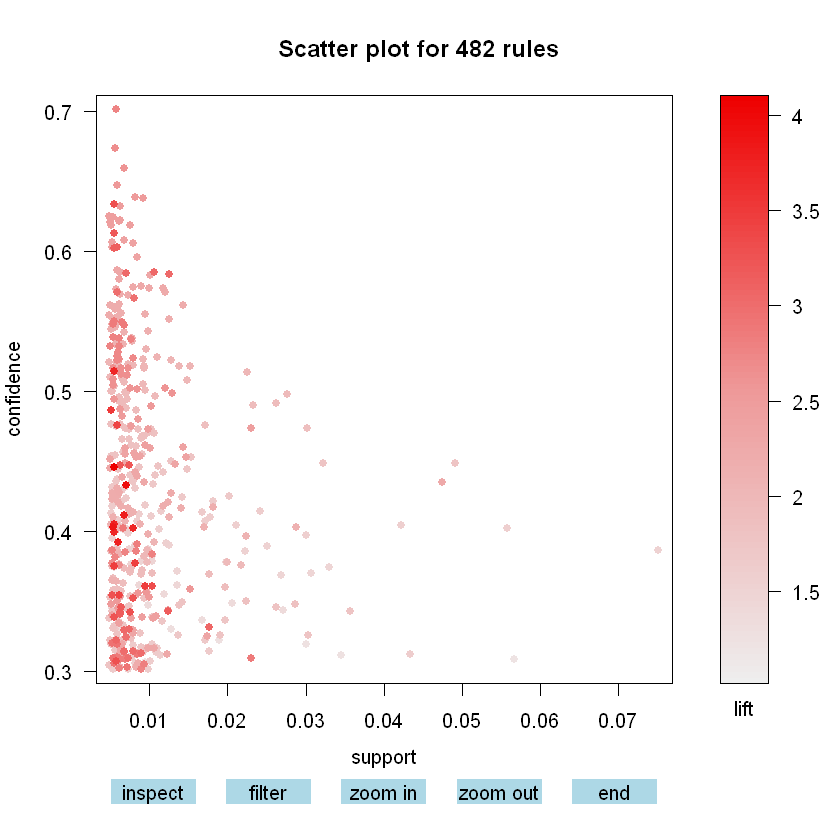

In [31]:
plot(G_arulesViz,interactive=TRUE)

Interactive mode.
Select a region with two clicks!


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


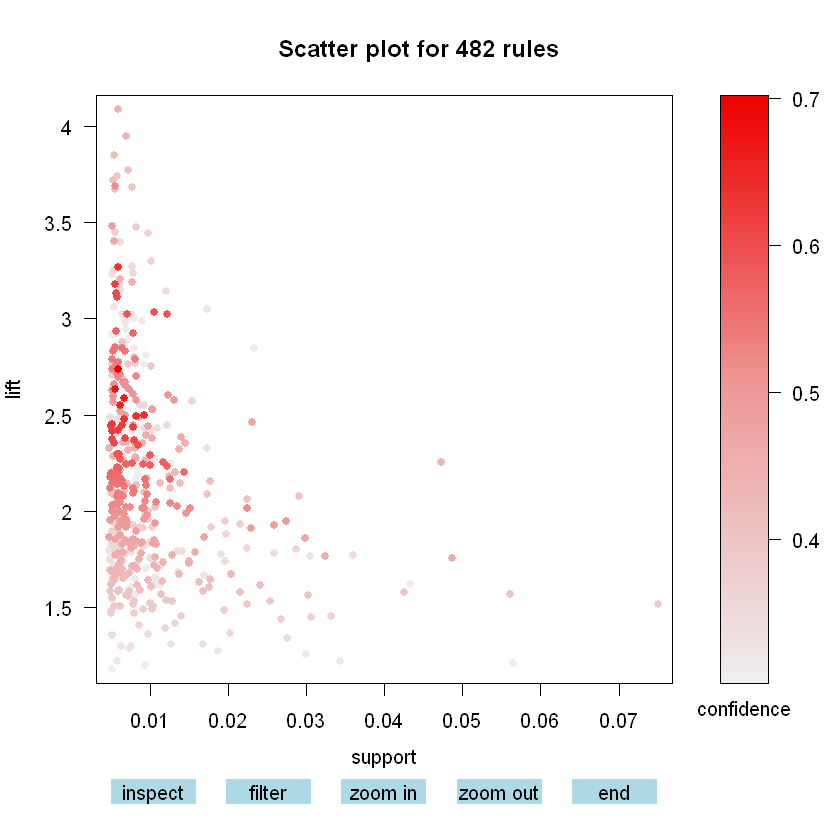

In [32]:
plot(G_arulesViz, measure=c("support", "lift"), shading="confidence", interactive=TRUE)

In [33]:
G_arulesViz_sub1 <- G_arulesViz[quality(G_arulesViz)$confidence > 0.5]
G_arulesViz_sub1

set of 113 rules 